<a href="https://colab.research.google.com/github/Vasugi2003/Big-Data-Analytics/blob/main/Iris_dataset_spark_session_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=9eb1c196d6a01a52b490fb40cc4358eb33da9df2de7a0b28915969935db28fe6
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("IrisKMeans").getOrCreate()

In [ ]:
iris_data = spark.read.csv("/content/iris.csv",header=True,inferSchema=True)

In [ ]:
feature_cols = iris_data.columns[:-1]

In [ ]:
from pyspark.ml.feature import VectorAssembler,StandardScaler
from pyspark.ml.clustering import KMeans

In [ ]:
assembler = VectorAssembler(inputCols=feature_cols,outputCol="features")
data = assembler.transform(iris_data)

In [ ]:
scaler = StandardScaler(inputCol="features",outputCol="scaled_features")
scaler_model = scaler.fit(data)
scaled_data = scaler_model.transform(data)

In [ ]:
kmeans = KMeans(k=4, seed=1)

In [ ]:
model = kmeans.fit(scaled_data)

In [ ]:
clustered_data = model.transform(scaled_data)

In [ ]:
pandas_df = clustered_data.toPandas()

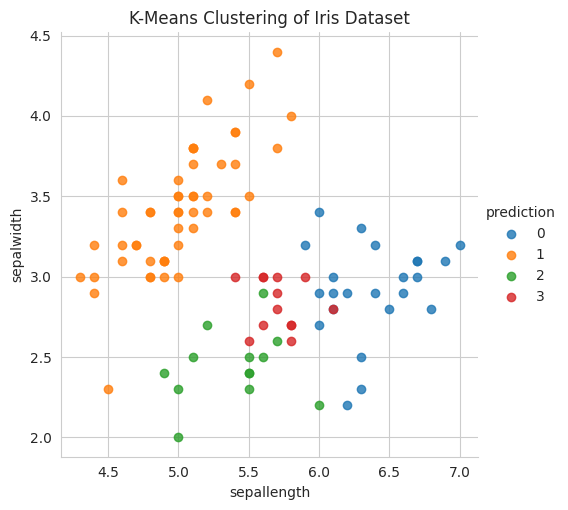

In [ ]:
sns.set_style("whitegrid")
sns.lmplot(x='sepallength',y='sepalwidth', data=pandas_df, fit_reg=False, hue="prediction")
plt.title("K-Means Clustering of Iris Dataset")
plt.show()
spark.stop()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


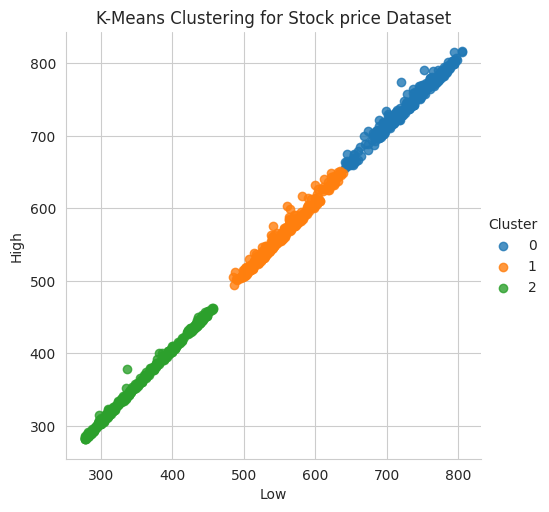

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

file_path = "/content/Stock_Price_Train.csv"
breast_cancer_df = pd.read_csv(file_path)

features = breast_cancer_df[['Low', 'High']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
scaled_data_df = pd.DataFrame(scaled_data, columns=['Low', 'High'])
scaled_data_df = scaled_data_df.fillna(scaled_data_df.mean())


kmeans = KMeans(n_clusters=3, random_state=1)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(scaled_data_df)

# Make sure the 'Cluster' column has the same length as the DataFrame
breast_cancer_df["Cluster"] = clusters[:len(breast_cancer_df)]

sns.set_style("whitegrid")
sns.lmplot(x='Low', y='High', data=breast_cancer_df, fit_reg=False, hue="Cluster")
plt.title("K-Means Clustering for Stock price Dataset")
plt.show()
